# PART II. MODEL BUILDING - DECISION TREE AND RANDOM FOREST

### PREPROCESSING

In [18]:
# Useful libraries

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
# Loading dataset

dataset = pd.read_csv("Dataset_for_model_building.csv")

In [3]:
# Splitting the dataset in two tables : Y for the target 'class' and X for the explanatory features

target_name = "class"
Y = dataset.loc[:, target_name]
X = dataset.loc[:, [c for c in dataset.columns if c != target_name]]

display(Y.head())
print()
display(X.head())

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64

,purchase_value,source,browser,sex,age,country,month
0,34,SEO,Chrome,M,39,Japan,4
1,16,Ads,Chrome,F,53,United States,6
2,15,SEO,Opera,M,53,United States,1
3,44,SEO,Safari,M,41,Unknown country,5
4,39,Ads,Safari,M,45,United States,9


In [4]:
# One Hot Encoding for categorical variables of X

X = pd.get_dummies(X)
X.head()

,purchase_value,age,month,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,...,country_Tunisia,country_Turkey,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Unknown country,country_Uruguay,country_Venezuela,country_Viet Nam
0,34,39,4,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,53,6,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,15,53,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,44,41,5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,39,45,9,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
# Splitting the dataset in Train and Test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)

### DECISION TREE

In [6]:
dt_clf = DecisionTreeClassifier(class_weight = 'balanced')
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced')

In [7]:
# Predicting

Y_train_pred = dt_clf.predict(X_train)
Y_test_pred = dt_clf.predict(X_test)

In [8]:
# Computing f1_score

print("f1 score on train set is : ", f1_score(Y_train, Y_train_pred))
print("f1 score on test set is : ", f1_score(Y_test, Y_test_pred))

f1 score on train set is :  0.9823383193057433
f1 score on test set is :  0.53497258680844


In [9]:
# Computing classification scores

print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     27171
           1       0.50      0.57      0.53      2816

    accuracy                           0.91     29987
   macro avg       0.73      0.76      0.74     29987
weighted avg       0.91      0.91      0.91     29987



In [10]:
# Visualizing a confusion matrix

print("confusion matric for Train set")
print(confusion_matrix(Y_train, Y_train_pred) )

print("confusion matric for Test set")
print(confusion_matrix(Y_test, Y_test_pred))

confusion matric for Train set
[[108278    405]
 [     0  11263]]
confusion matric for Test set
[[25578  1593]
 [ 1206  1610]]


### CONCLUSION

The model is more satisfying than a Logistic Regression Model but it overfits a lot

### RANDOM FOREST

In [11]:
params = { 
         'max_depth' : [4, 6, 8],
        'n_estimators' : [100, 120, 140, 160, 180] }

grid_rf = GridSearchCV(RandomForestClassifier(class_weight = 'balanced'), param_grid = params, cv = 5)
grid_rf.fit(X_train, Y_train)

print("Hyperparameters that give the best score : ", grid_rf.best_params_)
print("Best score : ", grid_rf.best_score_)

Hyperparameters that give the best score :  {'max_depth': 6, 'n_estimators': 180}
Best score :  0.9418404756897487


In [12]:
Y_train_pred_rf = grid_rf.predict(X_train)
Y_test_pred_rf = grid_rf.predict(X_test)

In [13]:
# Computing f1_score

print("f1 score on train set is : ", f1_score(Y_train, Y_train_pred_rf))
print("f1 score on test set is : ", f1_score(Y_test, Y_test_pred_rf))

f1 score on train set is :  0.6380991907034654
f1 score on test set is :  0.6382716049382716


In [14]:
# Computing classification scores

print(classification_report(Y_test, Y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     27171
           1       0.76      0.55      0.64      2816

    accuracy                           0.94     29987
   macro avg       0.86      0.77      0.80     29987
weighted avg       0.94      0.94      0.94     29987



In [15]:
# Computing precision and recall on test set
print("precision score on train set is : ", precision_score(Y_test, Y_test_pred_rf))
print("recall score on test set is : ", recall_score(Y_test, Y_test_pred_rf))

precision score on train set is :  0.7588062622309197
recall score on test set is :  0.55078125


In [16]:
# Visualizing a confusion matrix

print("confusion matric for Train set")
print(confusion_matrix(Y_train, Y_train_pred_rf) )

print("confusion matric for Test set")
print(confusion_matrix(Y_test, Y_test_pred_rf))

confusion matric for Train set
[[106820   1863]
 [  5113   6150]]
confusion matric for Test set
[[26678   493]
 [ 1265  1551]]


### SCORE EXPLANATION

Here we want to detect as fraud as possible (positive result) while minimizing the false positive results (false alerte).

We have a recall of 55% which means that our model manages to detect 55% of the frauds and a precision of 76% which means that 76% of transactions detected as fraud by the model are indeed frauds.

### CROSS VALIDATION
We want to see how the score changes depending on the train test split

In [ ]:
scores = cross_val_score(grid_rf.best_estimator_, X_train, Y_train, cv=5)

In [ ]:
print('Scores mean:', scores.mean())
print('Scores standard deviation:', scores.std())

**CONCLUSION OF CROSS VALIDATION** : Scores are not significantly different with different train test split

### FEATURE IMPORTANCE

In [21]:
# Determining feature importance

clf_rf = RandomForestClassifier(max_depth= 4, n_estimators = 180, class_weight = 'balanced')
clf_rf = clf_rf.fit(X_train, Y_train)

clf_rf.feature_importances_

array([5.05096822e-02, 4.13622835e-02, 5.66802282e-01, 7.38205713e-03,
       3.70978439e-02, 1.37008809e-02, 2.12293860e-02, 7.99599534e-03,
       1.32803714e-02, 2.38298066e-03, 4.53850144e-03, 1.33856222e-02,
       8.43367743e-03, 4.09937745e-05, 6.42045042e-04, 1.87167500e-04,
       1.70145151e-03, 1.91300322e-04, 6.65199444e-04, 2.17016185e-03,
       1.00214466e-03, 2.87105437e-03, 7.35358391e-03, 4.09389886e-04,
       3.26239981e-03, 5.02473566e-04, 4.31128957e-04, 2.58880625e-05,
       2.26922792e-04, 1.22859528e-02, 3.25895872e-06, 3.76403063e-03,
       1.18828142e-03, 1.97663427e-04, 1.01346936e-03, 2.92831866e-03,
       1.57803676e-02, 2.57289851e-03, 1.46108716e-03, 2.59935809e-04,
       1.14381984e-03, 1.08984415e-03, 3.80308590e-04, 1.75136803e-02,
       1.13995290e-03, 1.12635396e-04, 3.79268814e-04, 6.22416918e-07,
       8.97692919e-06, 1.17658045e-04, 2.57378331e-03, 1.14611430e-04,
       6.72303863e-04, 1.88371017e-02, 5.77508379e-04, 6.37302293e-03,
      

In [32]:
# Putting feature importance in a Dataframe

df_coef = pd.DataFrame(data = clf_rf.feature_importances_, index = X.columns, columns = ['coefficient'])
df_coef = df_coef.apply(lambda x :abs(x)).sort_values(by = 'coefficient', ascending = False)
df_coef = df_coef.reset_index().rename({'index':'features'}, axis = 1)
df_coef

,features,coefficient
0,month,5.668023e-01
1,purchase_value,5.050968e-02
2,age,4.136228e-02
3,source_Direct,3.709784e-02
4,country_New Zealand,2.225905e-02
...,...,...
86,country_Kenya,8.976929e-06
87,country_Dominican Republic,3.258959e-06
88,country_Seychelles,1.647170e-06
89,country_Uruguay,1.102373e-06


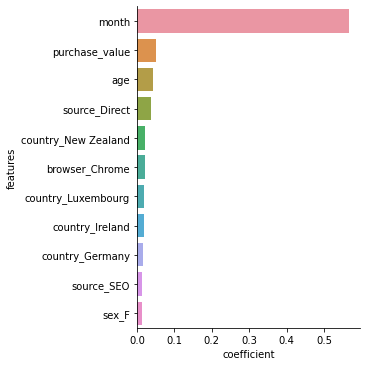

In [34]:
# Plotting feature importance

sns.catplot(x = 'coefficient', y = "features", data = df_coef.loc[:10,:], kind = 'bar')

#### FEATURE IMPORTANCE EXPLANATION
It seems that month, purchase and age are the most determining feature when predicting fraud.